In [1]:
from classMVA import MVA
import numpy as np
import matplotlib.pyplot as plt



In [2]:
import urllib2
from pyspark.mllib.regression import LabeledPoint

response = urllib2.urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.trn")
textdata = response.read()
RDD = sc.parallelize(textdata.split('\n')[:-1]).map(lambda line: line.split(" "))

RDD_labeled=RDD.map(lambda x: LabeledPoint(x[-1],x[0:-1]))

RDD_sat= RDD_labeled.sample(False, 0.05, 80)
print RDD_labeled.count()
print RDD_sat.count()
print RDD_sat.take(2)

4435
204
[LabeledPoint(4.0, [68.0,94.0,94.0,79.0,76.0,94.0,111.0,79.0,80.0,98.0,106.0,83.0,71.0,83.0,87.0,70.0,76.0,91.0,91.0,74.0,76.0,95.0,104.0,81.0,67.0,75.0,85.0,71.0,67.0,75.0,96.0,79.0,75.0,83.0,96.0,83.0]), LabeledPoint(3.0, [80.0,94.0,102.0,83.0,80.0,102.0,111.0,87.0,84.0,106.0,115.0,91.0,84.0,103.0,104.0,85.0,84.0,103.0,108.0,85.0,88.0,107.0,118.0,88.0,79.0,99.0,104.0,83.0,84.0,99.0,113.0,87.0,84.0,99.0,109.0,87.0])]


In [3]:
RDD_PCA = RDD_labeled.map(lambda x: x.features)
RDD_1=RDD_PCA.sample(False, 0.01, 80)
RDD_2=RDD_PCA.sample(False, 0.1, 80)
RDD_3=RDD_PCA
print RDD_1.count()
print RDD_2.count()
print RDD_3.count()

37
410
4435


In [4]:
for i in range(2):
    print str(i)

0
1


In [16]:
#ESCALABILIDAD
#self, typeMVA, typeReg,typeNorm, tol, regParam=0.01, step=1e-3, iterations=100, max_Ustep=10):
import time 
#print time.localtime( time.time() )
resta=0
for i in range(2):
    prueba = MVA('PCA','l1','None',1e-5,6,0.01,1e-3,100,30)
    print 'INIT TIME FOR ' + str(i+1) + ' samples ' + str(time.localtime( time.time() ))
    RDD_PCA_ESC=ESC_RDD[i]
    prueba.fit(RDD_PCA_ESC)
    print 'END TIME FOR RDD ' + str(i+1) + ' samples ' + str(time.localtime( time.time() ))

     


INIT TIME FOR 1 samples time.struct_time(tm_year=2017, tm_mon=6, tm_mday=16, tm_hour=23, tm_min=3, tm_sec=8, tm_wday=4, tm_yday=167, tm_isdst=1)
(6, 36)
(36, 36)
(36, 36)
Extracting projection vector 0 out of 6
Extracting projection vector 1 out of 6
Extracting projection vector 2 out of 6
Extracting projection vector 3 out of 6
Extracting projection vector 4 out of 6
Extracting projection vector 5 out of 6
(6, 36)
(36, 36)
(36, 36)
Extracting projection vector 0 out of 6
Extracting projection vector 1 out of 6
Extracting projection vector 2 out of 6
Extracting projection vector 3 out of 6
Extracting projection vector 4 out of 6
Extracting projection vector 5 out of 6
Frobenius norm error: 2.27553865253
(6, 36)
(36, 36)
(36, 36)
Extracting projection vector 0 out of 6
Extracting projection vector 1 out of 6
Extracting projection vector 2 out of 6
Extracting projection vector 3 out of 6
Extracting projection vector 4 out of 6
Extracting projection vector 5 out of 6
Frobenius norm error:

In [20]:
#ESCALABILIDAD
#self, typeMVA, typeReg,typeNorm, tol, regParam=0.01, step=1e-3, iterations=100, max_Ustep=10):
import time 
#print time.localtime( time.time() )
resta=0
for i in range(2):
    prueba = MVA('PCA','l1','None',1e-5,6,0.01,1e-3,100,30)
    print 'INIT TIME FOR ' + str(i+2) + ' samples ' + str(time.localtime( time.time() ))
    RDD_PCA_ESC=ESC_RDD[i+1]
    prueba.fit(RDD_PCA_ESC)
    print 'END TIME FOR RDD ' + str(i+2) + ' samples ' + str(time.localtime( time.time() ))


INIT TIME FOR 2 samples time.struct_time(tm_year=2017, tm_mon=6, tm_mday=17, tm_hour=0, tm_min=1, tm_sec=21, tm_wday=5, tm_yday=168, tm_isdst=1)
(6, 36)
(36, 36)
(36, 36)
Extracting projection vector 0 out of 6
Extracting projection vector 1 out of 6
Extracting projection vector 2 out of 6
Extracting projection vector 3 out of 6
Extracting projection vector 4 out of 6
Extracting projection vector 5 out of 6
(6, 36)
(36, 36)
(36, 36)
Extracting projection vector 0 out of 6
Extracting projection vector 1 out of 6
Extracting projection vector 2 out of 6
Extracting projection vector 3 out of 6
Extracting projection vector 4 out of 6
Extracting projection vector 5 out of 6
Frobenius norm error: 3.28163523203
(6, 36)
(36, 36)
(36, 36)
Extracting projection vector 0 out of 6
Extracting projection vector 1 out of 6
Extracting projection vector 2 out of 6
Extracting projection vector 3 out of 6
Extracting projection vector 4 out of 6
Extracting projection vector 5 out of 6
Frobenius norm error:

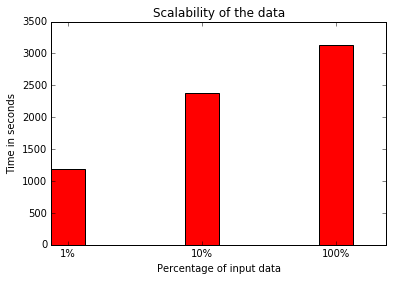

In [27]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
time = (1190,2375,3134)
#men_std = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.25       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, time, width, color='r')

#women_means = (25, 32, 34, 20, 25)
#women_std = (3, 5, 2, 3, 3)
#rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Time in seconds')
ax.set_xlabel('Percentage of input data')
ax.set_title('Scalability of the data')
ax.set_xticks(ind+ width / 2)
ax.set_xticklabels(('1%','10%','100%'))

plt.show()
#ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))